In [16]:
import sys
sys.path.append("../sketchformer")

from basic_usage.sketchformer import continuous_embeddings
sketchformer = continuous_embeddings.get_pretrained_model()

[run-experiment] resorting checkpoint if exists
[Checkpoint] Restored, step #207536


In [17]:
%matplotlib inline
from matplotlib import pyplot as plt

def visualize(sketch):
    X = []
    Y = []

    tmp_x, tmp_y = [], []
    sx = sy = 0
    for p in sketch:
        sx += p[0]
        sy += p[1]
        tmp_x.append(sx)
        tmp_y.append(-sy)
        if p[2] == 1:
            X.append(tmp_x)
            Y.append(tmp_y)
            tmp_x, tmp_y = [], []

    X.append(tmp_x)
    Y.append(tmp_y)

    for x, y in zip(X, Y):
        plt.plot(x, y)

    # save the image.
    # plt.savefig("sample.png")

    # show the plot
    plt.axes().set_aspect('equal')
    plt.show()

[[ -18  -33    0]
 [ -12  -12    0]
 [ -16    0    0]
 [  -7    4    0]
 [ -38   29    0]
 [ -24   26    0]
 [ -11   29    0]
 [  -8   55    0]
 [   0   67    0]
 [   2   15    0]
 [   6   10    0]
 [  11    9    0]
 [  51   19    0]
 [  18    5    0]
 [  33    3    0]
 [  21  -14    0]
 [  67  -89    0]
 [  10   -9    0]
 [  35  -59    0]
 [   7  -26    0]
 [  -8  -16    0]
 [ -10  -11    0]
 [  -6   -2    0]
 [-122    7    0]
 [   9   -6    1]
 [   3    0    0]
 [   5   -1    0]
 [   9  -12    0]
 [  27  -57    1]
 [ -35   44    0]
 [  33    0    0]
 [  10   -5    0]
 [   0   16    0]
 [  -9   12    0]
 [  -5    2    0]
 [ -19    0    0]
 [ -12   -8    0]
 [   2  -17    1]]


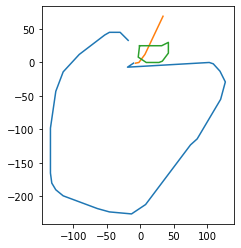

In [18]:
import numpy as np
import random

# load npz
filename = "../sketchformer/basic_usage/quickdraw_samples/sketchrnn_apple.npz"
apples = np.load(filename, encoding='latin1', allow_pickle=True)

# pick sample
N_apple = 1
apple_sketch = []
for _ in range(N_apple):
    ind = random.randint(0, len(apples['test']) - 1)
    apple_sketch.append(apples['test'][ind])

# visualize
print(apple_sketch[0])
visualize(apple_sketch[0])

In [19]:
sketchformer.classify(apple_sketch)

['apple']